<a href="https://colab.research.google.com/github/amansingh202/Machine-Learning/blob/main/Computer_Vision/CV_AS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Aman Kumar <br>
Hawk Id: A20538809 <br>
CS 512 (Computer Vision) <br>
Fall'24

# **Problem 1** <br>
Homogeneous Coordinates Representation (2D): Let x = (2, 3) be a point in 2D Cartesian coordinates.

In [2]:
x_cartesian = (2,3)

#Convert the point x into homogeneous coordinates XH.
x_h = (x_cartesian[0], x_cartesian[1], 1)

print(f"Homogeneous coordinates is {x_h}")

#Find another point in 2D homogeneous coordinates that is equivalent to the same point x (use a different scale).
scale = 2
x_h_2d = (x_h[0]*scale, x_h[1]*scale, x_h[2]*scale)

print(f"Another point in 2D homogeneous coordinates: {x_h_2d}")

#Convert both homogeneous coordinates back to Cartesian coordinates and verify they represent the same point.
x_cartesian_from_x_h = (x_h[0]/x_h[2], x_h[1]/x_h[2])
print(f"x cartesian from XH is : {x_cartesian_from_x_h}")

x_cartesian_from_x_h_2d = (x_h_2d[0]/x_h_2d[2], x_h_2d[1]/x_h_2d[2])
print(f"x cartesian from XH 2D is :{x_cartesian_from_x_h_2d}")


Homogeneous coordinates is (2, 3, 1)
Another point in 2D homogeneous coordinates: (4, 6, 2)
x cartesian from XH is : (2.0, 3.0)
x cartesian from XH 2D is :(2.0, 3.0)


# **Problem 2** <br>
Homogeneous Coordinates Representation (3D): Let y = (4, 5, 6) be a point in 3D Cartesian coordinates.

In [3]:
y_cartesian = (4, 5, 6)

#Convert y to its homogeneous coordinates representation.
y_homo = (y_cartesian[0], y_cartesian[1], y_cartesian[2], 1)

print(f"Homogeneous coordinates of y is : {y_homo}")

#Now, consider the homogeneous point y = (4, 5, 6, 1). Scale it by a factor of 2 and convert back to Cartesian coordinates.
scale = 2
y_homo_scaled = (y_homo[0]*scale, y_homo[1]*scale, y_homo[2]*scale, y_homo[3]*scale)

print(f"Scaled homogeneous coordinates are: {y_homo_scaled}")

y_cartesian_from_3DH = (y_homo_scaled[0]/y_homo_scaled[3], y_homo_scaled[1]/y_homo_scaled[3], y_homo_scaled[2]/y_homo_scaled[3])

print(f"Cartesian coordinates from 3DH are : {y_cartesian_from_3DH}")

Homogeneous coordinates of y is : (4, 5, 6, 1)
Scaled homogeneous coordinates are: (8, 10, 12, 2)
Cartesian coordinates from 3DH are : (4.0, 5.0, 6.0)


# **Problem 3** <br>
Affine Transformations in 2D: Given a point p = (1, 2) in 2D, apply the following transformations: <br>
Scale by a factor of .3 <br>
• Rotate counterclockwise by 45°. <br>
• Translate by (2, 3).

In [4]:
import numpy as np

p_cartesian = (2,3)
#Scale by a factor of 3
S = np.array([[3,0,0],
              [0,3,0],
              [0,0,1]]) #Scaling matrix

#Rotate counterclockwise by 45°
theta = np.radians(45)
sine_theta = np.sin(theta)
cos_theta = np.cos(theta)

#Rotation matrix is R
R = np.array([[cos_theta, -sine_theta, 0],
              [sine_theta, cos_theta, 0],
              [0,0,1]])

#Translate by (2, 3).
T = np.array([[1,0,2],
              [0,1,3],
              [0,0,1]])

#combined transformation C is C = T*R*S
C = T @ R @ S

#point p in 2DH coordinates
p_H = (p_cartesian[0], p_cartesian[1], 1)

#apply transformations to p, remember dimesnsion of C is 3x3
p_transformed = C @ p_H

print(f"Transformed point P is : {p_transformed}")

Transformed point P is : [-0.12132034 13.60660172  1.        ]


# **Problem 4**
Inverse Transformations (2D): Let q = (3, 4) be a point in 2D, and assume the following transformations have been applied: <br>
• Scale by 2. <br>
• Rotate by 30°. <br>
• Translate by (5,5).

In [5]:
q_cartesian = (3, 4)

#scale by 2
S = np.array([[2,0,0],
              [0,2,0],
              [0,0,1]])

#rotate by 30 degrees
theta = np.radians(30)
sine_theta = np.sin(theta)
cos_theta = np.cos(theta)

R = np.array([[cos_theta, -sine_theta, 0],
              [sine_theta, cos_theta, 0],
              [0,0,1]])

#Translate by (5,5)
T = np.array([[1,0,5],
                  [0,1,5],
                  [0,0,1]])


#Matrix is
M = T @ R @ S
#homogeneous coordinates of q is
q_H = (q_cartesian[0], q_cartesian[1], 1)

#transformed q is
q_transformed = M @ q_H
print(f"Transformed matrix is : {q_transformed}")

#inverse scale by 2
S_inv = np.array([[1/2,0,0],
                  [0,1/2,0],
                  [0,0,1]])


#inverse rotate by 30 degrees or rotation by -30 degrees

R_inv = np.array([[cos_theta, sine_theta, 0],
                  [-sine_theta,cos_theta,0],
                  [0,0,1]])

#Translate by (5,5), inverse translatio is (-5,-5)
T_inv = np.array([[1,0,-5],
                  [0,1,-5],
                  [0,0,1]])


#inverse matrix M trough matrix matrix multiplication is
M_inv = S_inv @ R_inv @ T_inv



q_original = M_inv @ q_transformed

print(f"Original Matrix is : {q_original}")

Transformed matrix is : [ 6.19615242 14.92820323  1.        ]
Original Matrix is : [3. 4. 1.]


# **Problem 5**
Transformations Between 3D Coordinate Systems: Consider two 3D coordinate systems:<br>
• System A has its origin at (1, 1, 1) and is aligned with the world axes.<br>
• System B has its origin at (2, 2, 2) and is rotated by 90° around the Z-axis.

In [6]:
#translation vector is
system_A = np.array([1,1,1])
system_B = np.array([2,2,2])
t_vector = system_B - system_A


#Translation matrix is
T5 = np.array([[1,0,0,1],
              [0,1,0,1],
              [0,0,1,1],
              [0,0,0,1]])

#System B is rotated by 90° around the Z-axis.
theta5 = np.radians(90)

#Rotation matrix
sine_theta5 = np.sin(theta5)
cos_theta5 = np.cos(theta5)

#to make the values exactly 0 for 90 degrees

if sine_theta5 < 1e-15:
  sine_theta5 = 0
elif cos_theta5 < 1e-15:
  cos_theta5 = 0

R5 = np.array([[cos_theta5, -sine_theta5, 0,0],
               [sine_theta5,cos_theta5, 0, 0],
               [0,0,1,0],
               [0,0,0,1]])

#Transformation matrix M5
M5 = T5 @ R5
print(f"Transformation matrix M5 is : {M5}")

#applying transformation at the point r = (3, 3, 3)
r_H5 = (3,3,3,1) #homogeneous coordinates

result5 = M5 @ r_H5

#point r in system B cartesian corordinates is

r_5_cartesian = np.array([result5[0]/result5[3], result5[1]/result5[3], result5[2]/result5[3]])

print(f"point r in cartesian coordinates to system B corordinates : {r_5_cartesian}")










Transformation matrix M5 is : [[ 0. -1.  0.  1.]
 [ 1.  0.  0.  1.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  0.  1.]]
point r in cartesian coordinates to system B corordinates : [-2.  4.  4.]


# **Problem 6**
Projection in Camera Coordinates (3D to 2D): Let a point in 3D camera coordinates be P = (1,2, 5). <br>
You are given the folowing camera intrinsic matrix K: <br>
K = [1000, 0, 500] <br>
      [0,  1000, 500]<br>
    [0, 0, 1]


In [7]:
#problem 6 below

#given intrinsic camera matrix K
K = np.array([[1000,0,500],
              [0,1000,500],
              [0,0,1]])

#3D cordinates of P
p_camera = np.array([1,2,5])

#Project the point P onto the 2D image plane using the intrinsic matrix K.
proj = K @ p_camera

print(f"Projection of point p is {proj}")

#Compute the 2D pixel coordinates of the projected point.
proj_2D = np.array([proj[0]/proj[2], proj[1]/proj[2]])

print(f"2D pixel coordinates of the projected point is : {proj_2D}")





Projection of point p is [3500 4500    5]
2D pixel coordinates of the projected point is : [700. 900.]


# **Explanation for Problem 6:**
1000 in the top left of matrix K is the focal length of the camera along the x axis in pixels ie.. fx. <br>
1000 in the middle of the matrix K is the focal length of the camera along the y axis in pixels ie.. fy. <br>
500 in the top right of matrix Kis the x coordinate of image center or principal point ie.. cx<br>
500 in the middle right of matrix K is the y coordinate of image center or principal point <br>
0's in the matrix are skew parameters which means that camera pixels are square and thus x and y axes are perpendicular to each other. <br>
1 in the bottom right of matrix K is the scaling factor



# **Problem 7**
General Camera Model (3D World Points to 2D Image Points): <br>
Transform a 3D world point X= (2, 3, 4) from world coordinates to 2D image coordinates. <br>You will need to: <br>
• Compute the extrinsic matrix from the rotation and translation. • Project the point onto the image plane. <br>
• Verify the 2D coordinates in pixels.

In [8]:
#problem 7 below

#camera parameters
K = np.array([[1200,0, 640],
              [0,1200,360],
              [0,0,1]])

#camera rotation matrix R
R = np.identity(3)

#Camera translation t = (0, 0, - 10) and changing it to column matrix .
t = np.array([[0],[0],[-10]])

#extrinsic matrix from rotation and translation
E_M = np.hstack((R,t))
print(f"Extrinsic matrix from rotation and translation is : \n{E_M}")

#point X = (2,3,4) in homogeneous coordinates
X_H = np.array([2,3,4,1])

#point X in camera coordinates
X_camera = E_M @ X_H

#Project the point onto the image plane.
p_image = K @ X_camera
p_image

#Verify the 2D coordinates in pixels.
p_image_2D = np.array([p_image[0]/p_image[2], p_image[1]/p_image[2]])
print(f"Point X in 2D image coordinates: \n {p_image_2D}")


Extrinsic matrix from rotation and translation is : 
[[  1.   0.   0.   0.]
 [  0.   1.   0.   0.]
 [  0.   0.   1. -10.]]
Point X in 2D image coordinates: 
 [ 240. -240.]


# **Problem 8**
Image Transformation using cv2.warpAffine (2D): Load an image using OpenCV. You will apply a combination of transformations (translation, rotation, and scaling) to the image. <br>
• First, compute the affine transformation matrix manually using translation (50, 30),
rotation by 30°, and scaling by a factor of 1.5. <br>
• Use OpenCV's cv2. warpAffine function to apply the transformation to the image. <br>
• Display both the original and transformed images

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from google.colab import files
uploaded = files.upload()

Saving lenna.png to lenna.png


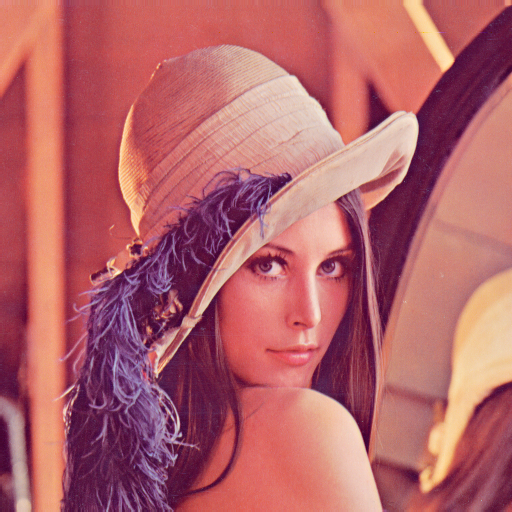

In [11]:
from google.colab.patches import cv2_imshow

# Example: Assuming the uploaded file is called 'image.jpg'
image_path = list(uploaded.keys())[0]

# Load the image
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)

Affine transformation matrix is 
: [[ 1.299038 -0.75     50.      ]
 [ 0.75      1.299038  1.      ]]


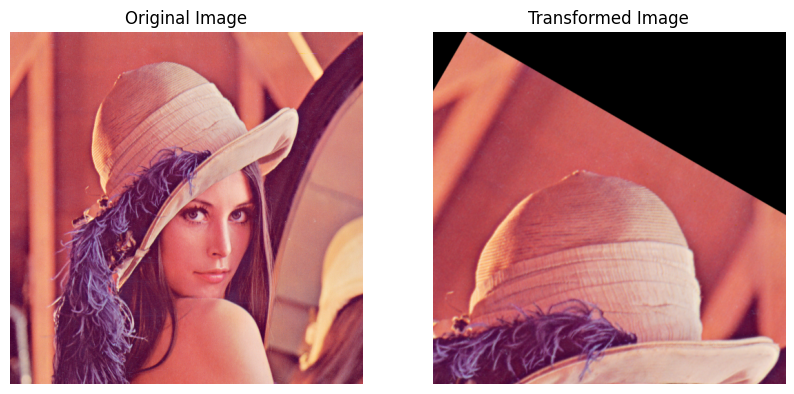

In [12]:
#height, and width of the image is
h, w = image.shape[:2]

#First, compute the affine transformation matrix manually using translation (50, 30), rotation by 30°, and scaling by a factor of 1.5.

#translation by (50,30)
tx, ty = 50,30

#rotation by 30°
angle = 30

angle_rad = np.radians(angle)

cos_theta = np.cos(angle_rad)
sine_theta = np.sin(angle_rad)

#scaling by 1.5
scale = 1.5

affine_trans_matrix = np.array([
    [scale*cos_theta, -scale*sine_theta, tx],
    [scale*sine_theta, scale*cos_theta, 1]
], dtype=np.float32)

print(f"Affine transformation matrix is \n: {affine_trans_matrix}")

#Use OpenCV's cv2. warpAffine function to apply the transformation to the image.
transformed_image = cv2.warpAffine(image, affine_trans_matrix, (w,h))

# Display the original and transformed images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in matplotlib
plt.axis('off')

# Transformed Image
plt.subplot(1, 2, 2)
plt.title("Transformed Image")
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# **Problem 9**
Order of Transformations: Let s = (1, 1) be a point in 2D.<br>
• Apply the following transformations in the order specified:<br>
1.Rotate by 90°.<br>2. Scale by a factor of 2. <br>3. Translate by (-1, 1).<br>
Now reverse the order of the transformations and apply them again. Observe and explain how the final position of s changes with different transformation orders.

In [31]:
#point in 2D is s=(1,1)
s = np.array([1,1])
#rotate by 90 degrees
angle_rad = np.radians(90)

sine_theta9 = np.sin(angle_rad)
cos_theta9 = np.cos(angle_rad)
if cos_theta9 < 1e-15:
  cos_theta9 = 0
elif sine_theta9 < 1e-15:
  sine_theta9 = 0
#rotation matrix R
R = np.array([
    [cos_theta9, -sine_theta9],
    [sine_theta9, cos_theta9]
])

#rotate point s using Matrix R
s_r = np.dot(R, s)

#scale by a factor of 2
S = np.array([
    [2,0],
    [0,2]
])

s_scale = np.dot(S, s_r)

#translate by (-1, 1)
T = (-1, 1)
s_translate = s_scale + T

print(f"Final result after rotation, scaling and translation is : \n {s_translate}")


#Now reverse the order of the transformations and apply them again. Observe and explain how the final position of s changes with different transformation orders.


#first translate by (-1,1)
s_translate_inv = s + T

#scale by a factor of 2
s_scale_inv = np.dot(S, s_translate_inv)

#rotate by 90 degrees
s_rotate_inv = np.dot(R, s_scale_inv)

print(f"Final result after reversing the order of transformations is: \n {s_rotate_inv}")

Final result after rotation, scaling and translation is : 
 [-3.  3.]
Final result after reversing the order of transformations is: 
 [-4.  0.]


# **Explanation for Problem 9**

1. In the original order **translation** happens after rotation and scaling which means that point poistion is affected by how much it is rotated and scaled before **translation**. Meanwhile, in the reverse order **translation** is performed before scaling and rotation. Thus, **translation** is not affected in the reverse order. <br><br>
2. In the original order **scaling** is applied after rotation whereas in the reverse order **scaling** is applied after translation. Thus, it changes the result as **scaling** intensifies the result. <br><br>
3.In the original order **Rotation** is performed at the beginning before Scaling and Translation whereas in the reverse order **Rotation** is performed after translation and scaling. **Rotation** when applied at different stages may lead to entirely different results. <br><br>

**Thus**, we can say that the order of transformations is important because unlike arithmetic operations like addition, geometric transformations like rotation, scaling and Translation donot give the same result when their order is changed. Each transformation that acts on the new position of the new position of the point has been affected by the previous transformation.
